In [1]:
import pandas as pd
import os
import time
from glob import glob
from ast import literal_eval
from collections import defaultdict
from tqdm import tqdm


In [2]:
# 固定支付方式和商品类（避免杂项干扰）
PAYMENT_METHODS = ['银联', '现金', '支付宝', '微信支付', '储蓄卡', '信用卡', '云闪付']
CATEGORIES = [
    '智能手机', '笔记本电脑', '平板电脑', '智能手表', '耳机', '音响', '相机', '摄像机', '游戏机',
    '上衣', '裤子', '裙子', '内衣', '鞋子', '帽子', '手套', '围巾', '外套',
    '零食', '饮料', '调味品', '米面', '水产', '肉类', '蛋奶', '水果', '蔬菜',
    '家具', '床上用品', '厨具', '卫浴用品',
    '文具', '办公用品',
    '健身器材', '户外装备',
    '玩具', '模型', '益智玩具',
    '婴儿用品', '儿童课外读物',
    '车载电子', '汽车装饰'
]


In [3]:
# 初始化统计量
joint_counts = defaultdict(int)
payment_counts = defaultdict(int)
category_counts = defaultdict(int)
total_rows = 0


In [4]:
# ====== 开始处理每个文件 ======
start_total = time.time()

# 获取文件列表
files = glob("./30G_data_new_partial/*.parquet")
# files = glob("./*.parquet")


In [5]:
# 遍历所有文件
for file in files:
    print(f"\n\n处理文件: {os.path.basename(file)}")
    t0 = time.time()

    # 读取文件
    df = pd.read_parquet(file)
    t1 = time.time()
    print(f"\n读取文件 {os.path.basename(file)} 用时: {t1 - t0:.2f} 秒")

    # 更新计数
    count = 0
    for _, row in tqdm(df.iterrows(), total=len(df)):
        pay = row['payment_method']
        if pay not in PAYMENT_METHODS:
            continue

        cats = [c for c in row['categories'] if c in CATEGORIES]
        if not cats:
            continue

        payment_counts[pay] += 1
        for c in cats:
            joint_counts[(pay, c)] += 1
            category_counts[c] += 1
        total_rows += 1
        count += 1

    t2 = time.time()
    print(f"统计处理行数：{count}，计数更新用时: {t2 - t1:.2f} 秒")




处理文件: part-00008.parquet

读取文件 part-00008.parquet 用时: 4.93 秒


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8437500/8437500 [07:56<00:00, 17699.52it/s]


统计处理行数：8437500，计数更新用时: 476.72 秒


处理文件: part-00013.parquet

读取文件 part-00013.parquet 用时: 5.13 秒


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8437500/8437500 [08:02<00:00, 17488.04it/s]


统计处理行数：8437500，计数更新用时: 482.48 秒


处理文件: part-00002.parquet

读取文件 part-00002.parquet 用时: 5.47 秒


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8437500/8437500 [08:09<00:00, 17224.60it/s]


统计处理行数：8437500，计数更新用时: 489.85 秒


处理文件: part-00015.parquet

读取文件 part-00015.parquet 用时: 5.45 秒


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8437500/8437500 [08:01<00:00, 17523.21it/s]


统计处理行数：8437500，计数更新用时: 481.52 秒


处理文件: part-00010.parquet

读取文件 part-00010.parquet 用时: 5.51 秒


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8437500/8437500 [08:07<00:00, 17314.98it/s]


统计处理行数：8437500，计数更新用时: 487.30 秒


处理文件: part-00006.parquet

读取文件 part-00006.parquet 用时: 5.03 秒


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8437500/8437500 [08:01<00:00, 17508.79it/s]


统计处理行数：8437500，计数更新用时: 481.91 秒


处理文件: part-00014.parquet

读取文件 part-00014.parquet 用时: 5.29 秒


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8437500/8437500 [08:01<00:00, 17511.58it/s]


统计处理行数：8437500，计数更新用时: 481.83 秒


处理文件: part-00011.parquet

读取文件 part-00011.parquet 用时: 5.01 秒


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8437500/8437500 [08:05<00:00, 17377.42it/s]


统计处理行数：8437500，计数更新用时: 485.55 秒


处理文件: part-00004.parquet

读取文件 part-00004.parquet 用时: 5.17 秒


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8437500/8437500 [08:08<00:00, 17268.14it/s]


统计处理行数：8437500，计数更新用时: 488.62 秒


处理文件: part-00012.parquet

读取文件 part-00012.parquet 用时: 5.77 秒


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8437500/8437500 [08:00<00:00, 17568.90it/s]


统计处理行数：8437500，计数更新用时: 480.26 秒


处理文件: part-00009.parquet

读取文件 part-00009.parquet 用时: 4.91 秒


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8437500/8437500 [08:06<00:00, 17330.50it/s]


统计处理行数：8437500，计数更新用时: 486.86 秒


处理文件: part-00000.parquet

读取文件 part-00000.parquet 用时: 5.50 秒


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8437500/8437500 [08:06<00:00, 17347.21it/s]


统计处理行数：8437500，计数更新用时: 486.40 秒


处理文件: part-00003.parquet

读取文件 part-00003.parquet 用时: 4.83 秒


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8437500/8437500 [08:07<00:00, 17296.67it/s]


统计处理行数：8437500，计数更新用时: 487.81 秒


处理文件: part-00001.parquet

读取文件 part-00001.parquet 用时: 5.14 秒


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8437500/8437500 [08:13<00:00, 17102.45it/s]


统计处理行数：8437500，计数更新用时: 493.35 秒


处理文件: part-00007.parquet

读取文件 part-00007.parquet 用时: 5.22 秒


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8437500/8437500 [08:06<00:00, 17360.41it/s]


统计处理行数：8437500，计数更新用时: 486.03 秒


处理文件: part-00005.parquet

读取文件 part-00005.parquet 用时: 4.95 秒


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8437500/8437500 [08:10<00:00, 17199.38it/s]

统计处理行数：8437500，计数更新用时: 490.57 秒


In [6]:
print(payment_counts)
print(joint_counts)
print(category_counts)
print(total_rows)

defaultdict(<class 'int'>, {'支付宝': 19282785, '现金': 19287371, '云闪付': 19285076, '微信支付': 19284126, '银联': 19288659, '储蓄卡': 19288753, '信用卡': 19283230})
defaultdict(<class 'int'>, {('支付宝', '笔记本电脑'): 1406004, ('支付宝', '零食'): 1436515, ('支付宝', '智能手机'): 1452439, ('现金', '智能手机'): 1449883, ('现金', '婴儿用品'): 1376304, ('现金', '儿童课外读物'): 1395441, ('现金', '模型'): 1515595, ('现金', '玩具'): 1329881, ('现金', '蔬菜'): 1340800, ('云闪付', '平板电脑'): 1370100, ('云闪付', '裤子'): 1417313, ('云闪付', '调味品'): 1285252, ('云闪付', '耳机'): 1424002, ('云闪付', '水产'): 1304293, ('微信支付', '益智玩具'): 1413954, ('微信支付', '文具'): 1502110, ('微信支付', '蛋奶'): 1332733, ('微信支付', '婴儿用品'): 1377580, ('微信支付', '平板电脑'): 1371060, ('银联', '帽子'): 1372898, ('银联', '米面'): 1350128, ('银联', '床上用品'): 1330570, ('银联', '音响'): 1252871, ('银联', '儿童课外读物'): 1393852, ('银联', '笔记本电脑'): 1407042, ('银联', '水产'): 1299919, ('银联', '围巾'): 1510563, ('支付宝', '围巾'): 1508548, ('支付宝', '蔬菜'): 1341582, ('支付宝', '婴儿用品'): 1375957, ('银联', '办公用品'): 1309158, ('银联', '汽车装饰'): 1320563, ('现金', '零食'): 1435419, ('支付宝', 

In [7]:
# ====== 统计指标计算 ======
print("\n开始计算关联规则指标...")
start_calc = time.time()

# 计算支持度、置信度、提升度
results = []
for pay in PAYMENT_METHODS:
    for cat in CATEGORIES:
        joint = joint_counts.get((pay, cat), 0)
        if joint == 0:
            continue

        sup = joint / total_rows
        conf = joint / payment_counts[pay] if payment_counts[pay] > 0 else 0
        lift = conf / (category_counts[cat] / total_rows) if category_counts[cat] > 0 else 0

        results.append({
            "支付方式": pay,
            "商品类别": cat,
            "共现次数": joint,
            "支持度": round(sup, 5),
            "置信度": round(conf, 5),
            "提升度": round(lift, 3)
        })



开始计算关联规则指标...


In [8]:
# print
print(results)


[{'支付方式': '银联', '商品类别': '智能手机', '共现次数': 1452326, '支持度': 0.01076, '置信度': 0.07529, '提升度': 1.0}, {'支付方式': '银联', '商品类别': '笔记本电脑', '共现次数': 1407042, '支持度': 0.01042, '置信度': 0.07295, '提升度': 1.0}, {'支付方式': '银联', '商品类别': '平板电脑', '共现次数': 1371839, '支持度': 0.01016, '置信度': 0.07112, '提升度': 1.0}, {'支付方式': '银联', '商品类别': '智能手表', '共现次数': 1398698, '支持度': 0.01036, '置信度': 0.07251, '提升度': 0.999}, {'支付方式': '银联', '商品类别': '耳机', '共现次数': 1422716, '支持度': 0.01054, '置信度': 0.07376, '提升度': 1.0}, {'支付方式': '银联', '商品类别': '音响', '共现次数': 1252871, '支持度': 0.00928, '置信度': 0.06495, '提升度': 0.998}, {'支付方式': '银联', '商品类别': '相机', '共现次数': 1372437, '支持度': 0.01017, '置信度': 0.07115, '提升度': 1.001}, {'支付方式': '银联', '商品类别': '摄像机', '共现次数': 1231714, '支持度': 0.00912, '置信度': 0.06386, '提升度': 1.0}, {'支付方式': '银联', '商品类别': '游戏机', '共现次数': 1418343, '支持度': 0.01051, '置信度': 0.07353, '提升度': 1.0}, {'支付方式': '银联', '商品类别': '上衣', '共现次数': 1313690, '支持度': 0.00973, '置信度': 0.06811, '提升度': 1.0}, {'支付方式': '银联', '商品类别': '裤子', '共现次数': 1417214, '支持度': 0.0105, '置信度': 0.07

In [9]:
# to dataframe
df_result = pd.DataFrame(results)
df_result = df_result.sort_values(by="置信度", ascending=False)
print(df_result)

end_calc = time.time()
print(f"指标计算完成，用时: {end_calc - start_calc:.2f} 秒")


     支付方式 商品类别     共现次数      支持度      置信度    提升度
162  微信支付   模型  1517932  0.01124  0.07871  1.001
288   云闪付   模型  1517449  0.01124  0.07869  1.001
204   储蓄卡   模型  1516621  0.01123  0.07863  1.000
36     银联   模型  1516743  0.01124  0.07863  1.000
120   支付宝   模型  1515893  0.01123  0.07861  1.000
..    ...  ...      ...      ...      ...    ...
49     现金  摄像机  1232210  0.00913  0.06389  1.000
217   信用卡  摄像机  1231555  0.00912  0.06387  1.000
7      银联  摄像机  1231714  0.00912  0.06386  1.000
91    支付宝  摄像机  1230984  0.00912  0.06384  0.999
175   储蓄卡  摄像机  1231293  0.00912  0.06383  0.999

[294 rows x 6 columns]
指标计算完成，用时: 0.03 秒


In [10]:
# ====== 写出结果 ======
save_path = "支付方式_商品类别_关联规则.csv"
df_result.to_csv(save_path, index=False, encoding='utf-8-sig')
end_total = time.time()
print(f"\n全部处理完成，结果保存到 {save_path}")
print(f"总耗时: {end_total - start_total:.2f} 秒")



全部处理完成，结果保存到 支付方式_商品类别_关联规则.csv
总耗时: 7850.42 秒


数据集预览：
   支付方式 商品类别     共现次数      支持度      置信度    提升度
0  微信支付   模型  1517932  0.01124  0.07871  1.001
1   云闪付   模型  1517449  0.01124  0.07869  1.001
2   储蓄卡   模型  1516621  0.01123  0.07863  1.000
3    银联   模型  1516743  0.01124  0.07863  1.000
4   支付宝   模型  1515893  0.01123  0.07861  1.000


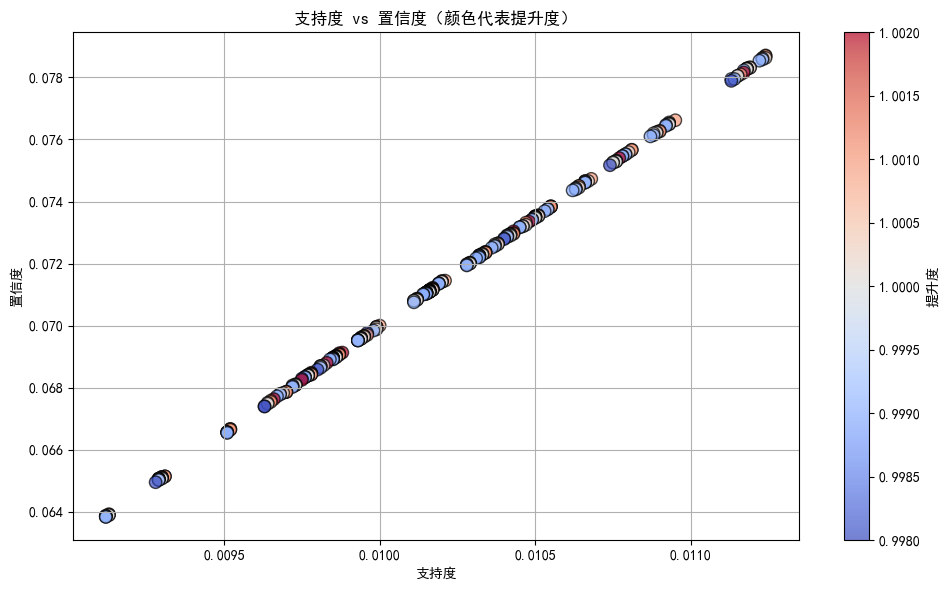

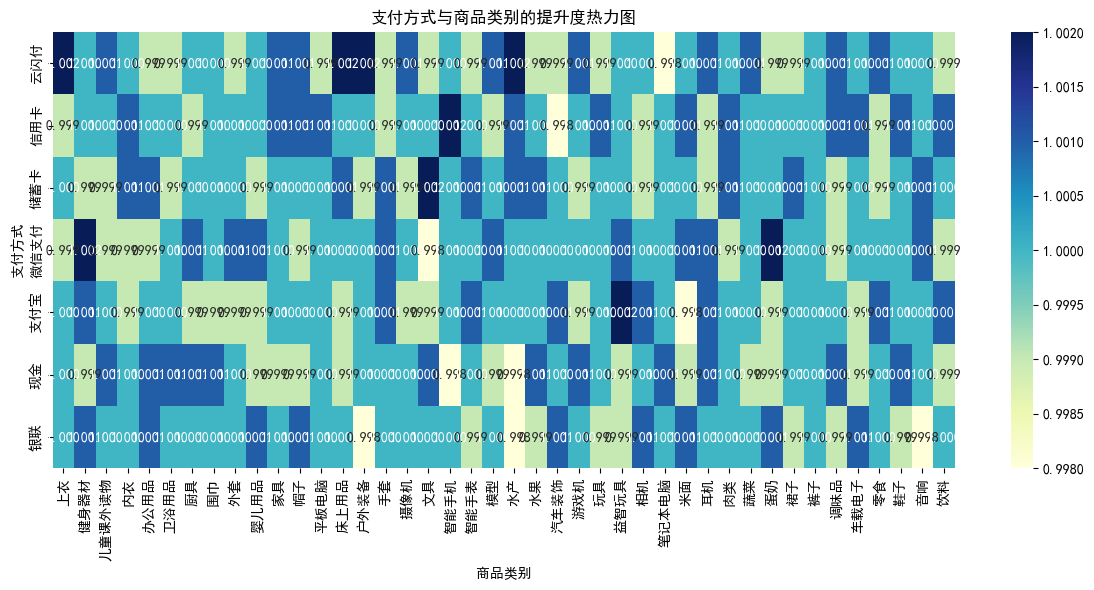

C:\Users\Highee\AppData\Local\Temp\ipykernel_34748\1347355092.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_lift.index, y=avg_lift.values, palette="viridis")


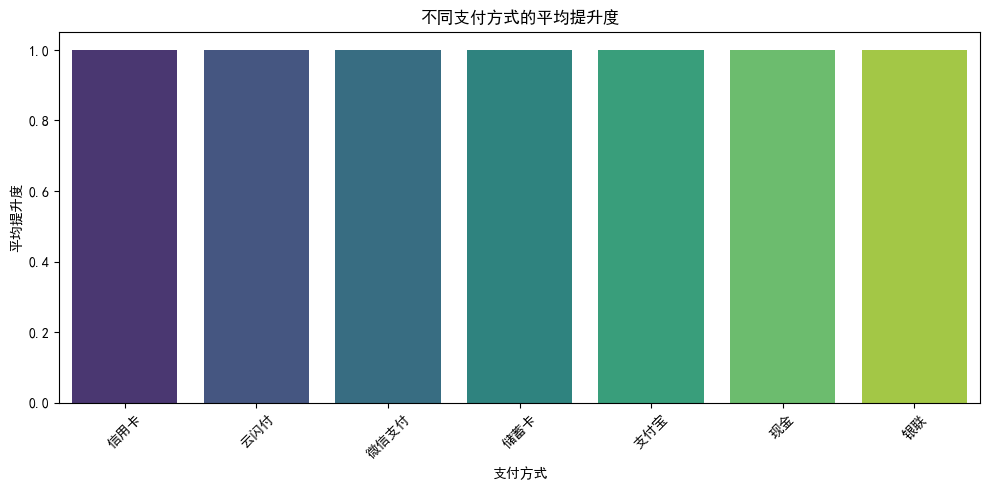

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取 CSV 文件
save_path = "支付方式_商品类别_关联规则.csv"
df = pd.read_csv(save_path)

# 设置中文字体（防止中文乱码）
plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False

# 基础信息
print("数据集预览：")
print(df.head())

# 1. 散点图：支持度 vs 置信度，点的颜色代表提升度
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df["支持度"], df["置信度"], 
    c=df["提升度"], cmap="coolwarm", s=80, alpha=0.7, edgecolors='k'
)
plt.colorbar(scatter, label="提升度")
plt.xlabel("支持度")
plt.ylabel("置信度")
plt.title("支持度 vs 置信度（颜色代表提升度）")
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. 热力图：透视表（支付方式 x 商品类别） -> 提升度
pivot = df.pivot_table(index="支付方式", columns="商品类别", values="提升度", aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt=".3f")
plt.title("支付方式与商品类别的提升度热力图")
plt.tight_layout()
plt.show()

# 3. 条形图：不同支付方式的平均提升度
avg_lift = df.groupby("支付方式")["提升度"].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_lift.index, y=avg_lift.values, palette="viridis")
plt.ylabel("平均提升度")
plt.title("不同支付方式的平均提升度")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
